<a href="https://colab.research.google.com/github/sudhanshukhare18/Skill_wallet_insuranace_fraud_detection/blob/main/insurance_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,f1_score
import warnings
import pickle

In [54]:
from google.colab import files
uploaded = files.upload()

Saving insurance_claims.csv to insurance_claims (1).csv


In [55]:
df = pd.read_csv('/content/insurance_claims.csv')

In [56]:
df.sample(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
339,212,35,620855,1990-04-29,IN,500/1000,2000,1123.89,0,468313,...,?,50380,4580,4580,41220,Suburu,Forrestor,1996,N,NaN
774,70,28,265437,2003-10-11,IL,250/500,1000,1319.81,0,613587,...,YES,31680,3520,3520,24640,Toyota,Camry,2006,N,NaN
178,245,40,144323,2001-09-14,IN,500/1000,500,885.08,0,459984,...,NO,85150,13100,13100,58950,Chevrolet,Malibu,1998,N,NaN
400,369,53,936638,1995-05-20,OH,250/500,2000,1459.93,0,438584,...,NO,77990,7090,14180,56720,Jeep,Wrangler,2012,N,NaN
206,128,32,547744,2001-07-08,OH,100/300,2000,768.91,0,443522,...,NO,59800,5980,5980,47840,Ford,F150,1999,Y,NaN


In [57]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [58]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [60]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [61]:
df.isna().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [62]:
df.isna().any()

,0
months_as_customer,False
age,False
policy_number,False
policy_bind_date,False
policy_state,False
policy_csl,False
policy_deductable,False
policy_annual_premium,False
umbrella_limit,False
insured_zip,False


## **Doing Exploratory Data Analysis For this DataSet**

> Checking Null Values



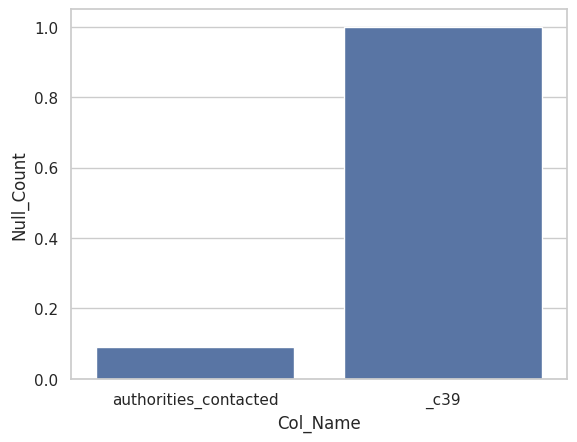

In [63]:
#in missing all columns with percentage of data is null
missing = df.isnull().sum() / len(df)


#it eliminate all columns except those have null value
missing = missing[missing > 0]

#For Sorting
missing.sort_values(inplace=True)

# for converting to object type from dfloat
missing = missing.to_frame()


# missing.dtypes    checking datatype

# for nameing
missing.columns = ['Null_Count']
missing.index.names = ['Col_Name']

# for reseting index
missing = missing.reset_index()

# Building Graphs
sns.set(style="whitegrid")
sns.barplot(y="Null_Count", x="Col_Name", data=missing)


# plt.xticks(rotation=90)   it rotate the colmun name to 90*


plt.show()


In [64]:
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0]  )
df['authorities_contacted']

,authorities_contacted
0,Police
1,Police
2,Police
3,Police
4,Police
...,...
995,Fire
996,Fire
997,Police
998,Other


In [65]:
df.sample()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
411,84,29,630998,2003-04-09,OH,250/500,1000,1117.17,0,473645,...,YES,6820,620,1240,4960,BMW,3 Series,2005,N,NaN


In [66]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

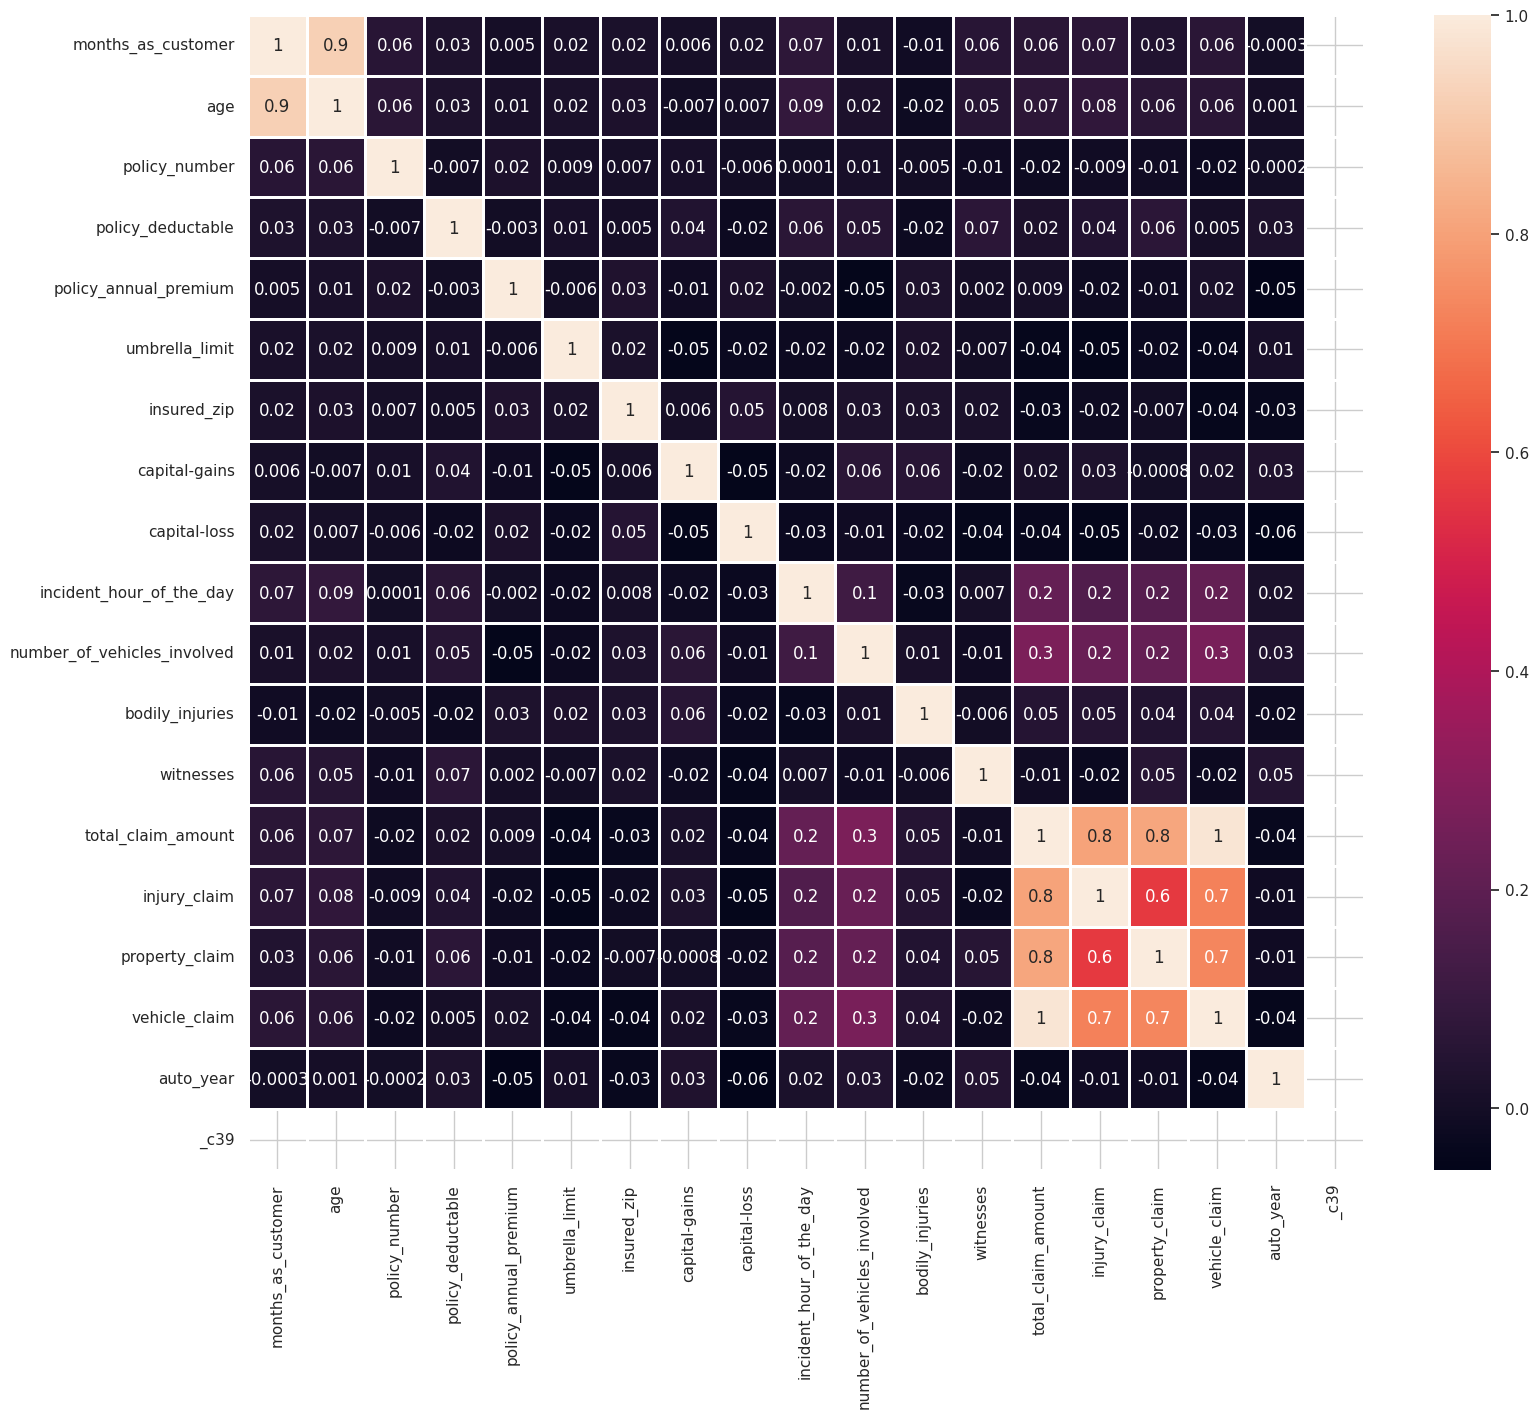

In [67]:
# Defining Size
plt.figure(figsize=(18,15))

# Building Correlation       * heatmap accept only numerical data
# corr = df.drop(columns=['policy_bind_date','policy_state','policy_csl']).corr()
corr = df.corr(numeric_only=True)
sns.heatmap(data = corr, annot=True,fmt='.1g',linewidths=2)
plt.show()


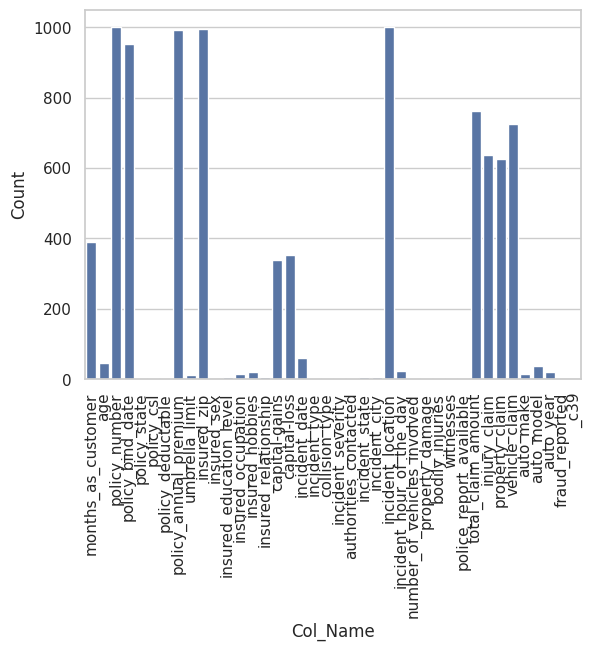

<Figure size 640x480 with 0 Axes>

In [68]:
unique = df.nunique().to_frame()
unique.columns = ['Count']
unique.index.names = ['Col_Name']
unique = unique.reset_index()

sns.set(style="whitegrid" , color_codes=True)
sns.barplot(y="Count", x="Col_Name", data=unique)
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()
# unique

In [69]:
unique.sort_values(by='Count',ascending=False)

,Col_Name,Count
2,policy_number,1000
24,incident_location,1000
9,insured_zip,995
7,policy_annual_premium,991
3,policy_bind_date,951
31,total_claim_amount,763
34,vehicle_claim,726
32,injury_claim,638
33,property_claim,626
0,months_as_customer,391


In [70]:
IQR = []
IQR.append(df['age'].quantile(0.75) - df['age'].quantile(0.25))
IQR.append(df['policy_annual_premium'].quantile(0.75) - df['policy_annual_premium'].quantile(0.25))
IQR.append(df['total_claim_amount'].quantile(0.75) - df['total_claim_amount'].quantile(0.25))
IQR.append(df['umbrella_limit'].quantile(0.75) - df['umbrella_limit'].quantile(0.25))
IQR.append(df['property_claim'].quantile(0.75) - df['property_claim'].quantile(0.25))
IQR

[np.float64(12.0),
 np.float64(326.0875000000001),
 np.float64(28780.0),
 np.float64(0.0),
 np.float64(6440.0)]

In [71]:
df['age'].quantile(0.75)

np.float64(44.0)

In [72]:
upper=[]
upper.append(df['age'].quantile(0.75) + 1.5*IQR[0])
upper.append(df['policy_annual_premium'].quantile(0.75) + 1.5*IQR[1])
upper.append(df['umbrella_limit'].quantile(0.75)+1.5*(IQR[3]))
upper.append(df['total_claim_amount'].quantile(0.75)+1.5*(IQR[2]))
upper.append(df['property_claim'].quantile(0.75)+1.5*(IQR[4]))
upper

[np.float64(62.0),
 np.float64(1904.8262500000003),
 np.float64(0.0),
 np.float64(113762.5),
 np.float64(20545.0)]

months_as_customer


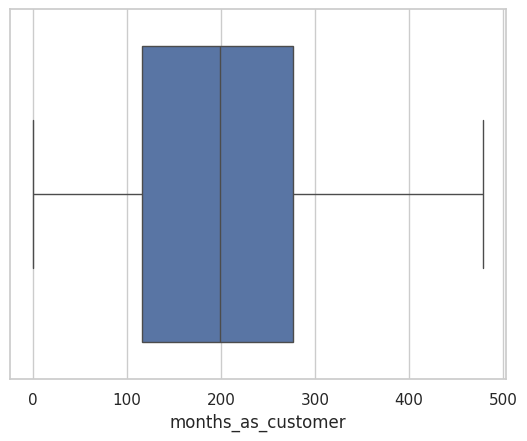

age


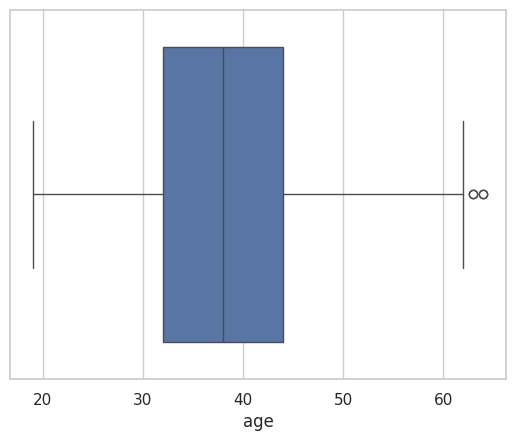

policy_number


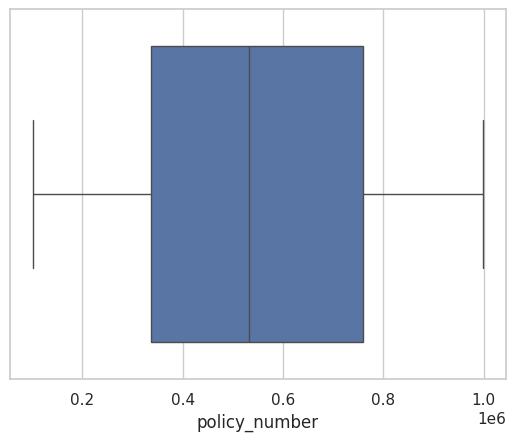

policy_bind_date


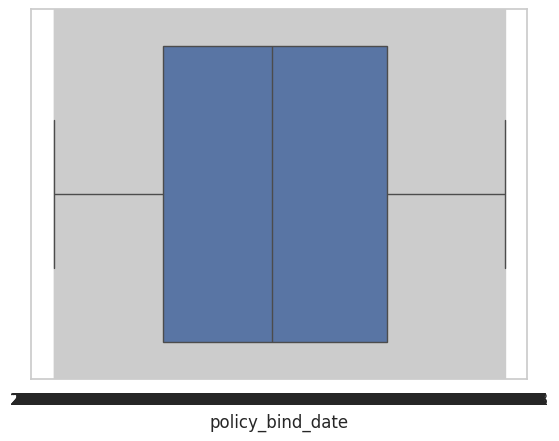

policy_state


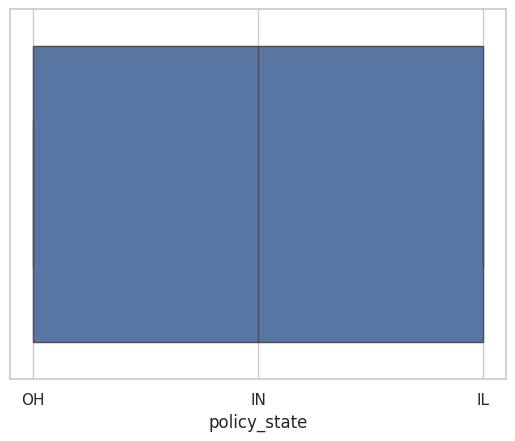

policy_csl


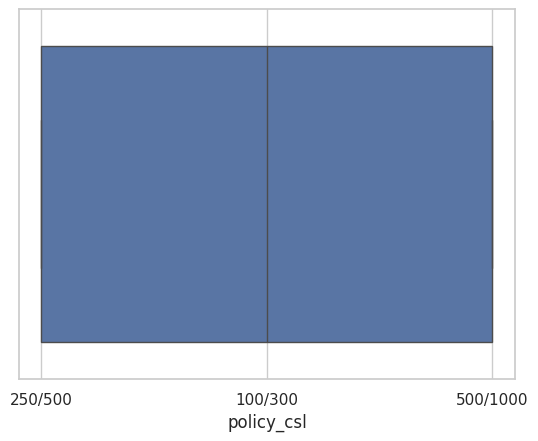

policy_deductable


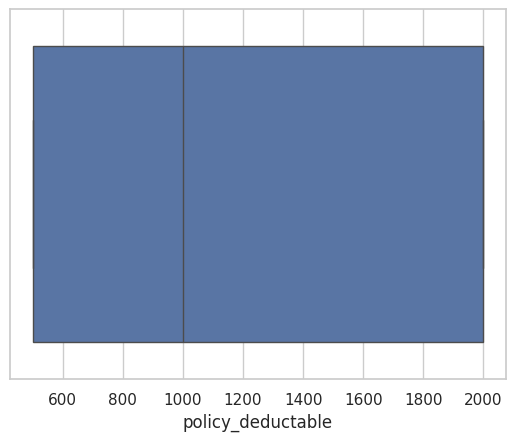

policy_annual_premium


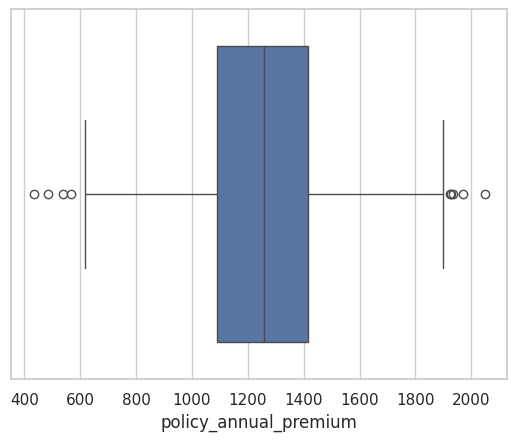

umbrella_limit


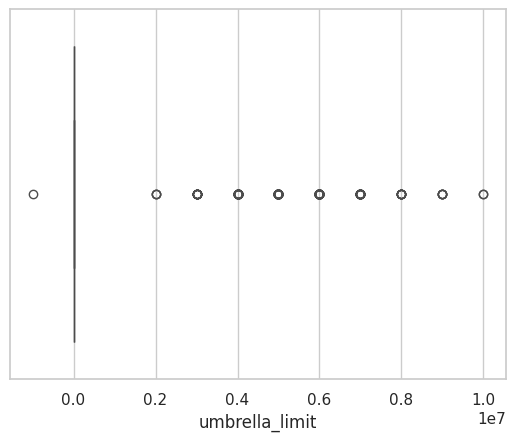

insured_zip


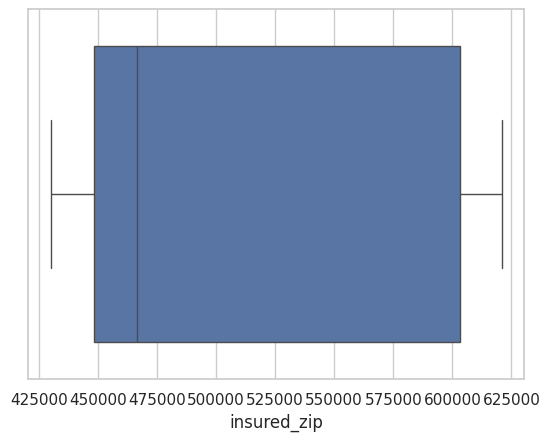

insured_sex


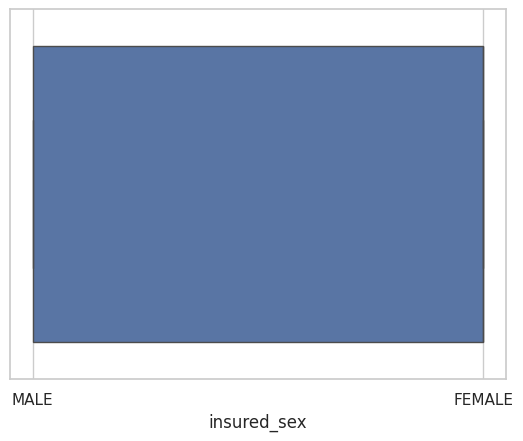

insured_education_level


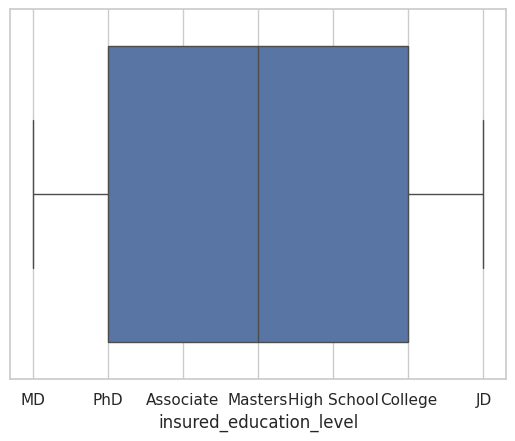

insured_occupation


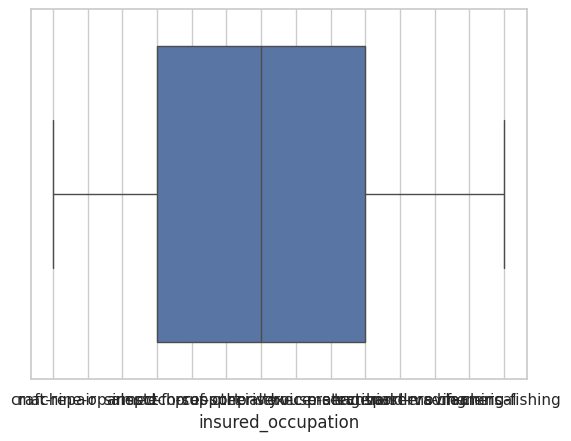

insured_hobbies


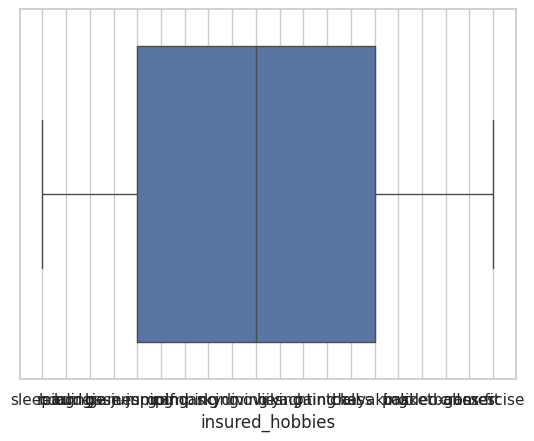

insured_relationship


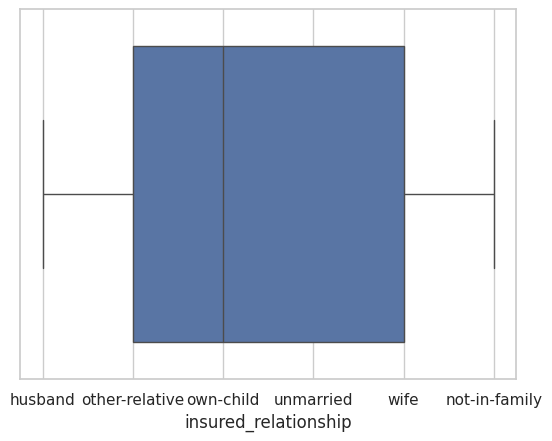

capital-gains


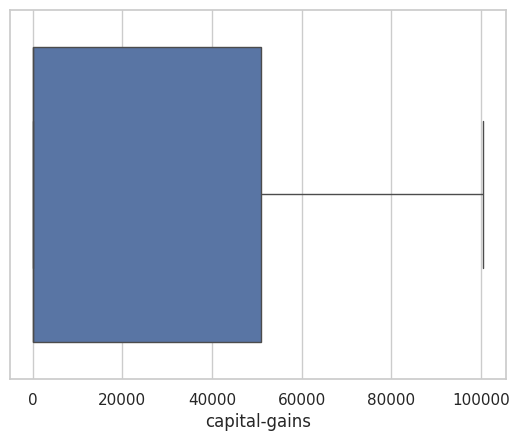

capital-loss


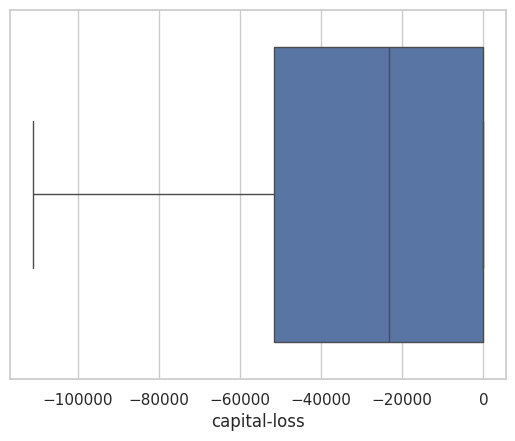

incident_date


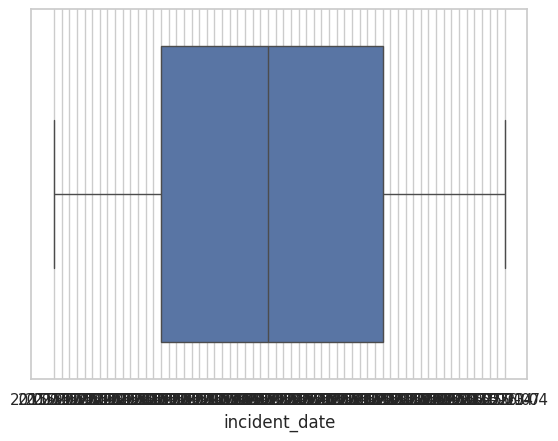

incident_type


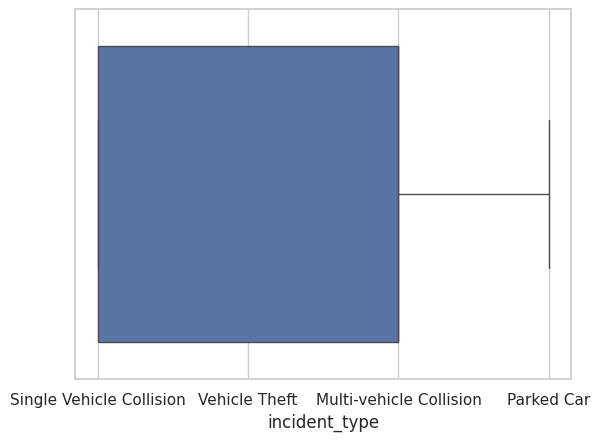

collision_type


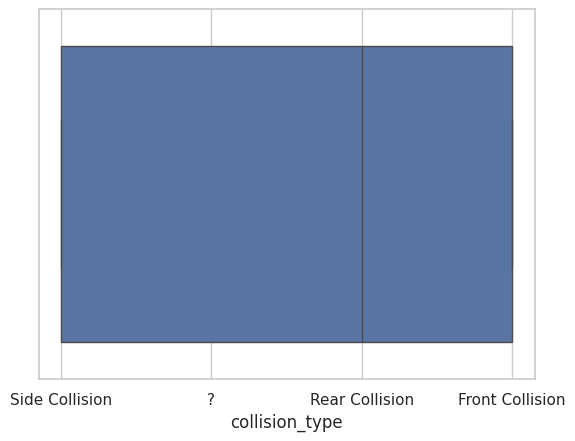

incident_severity


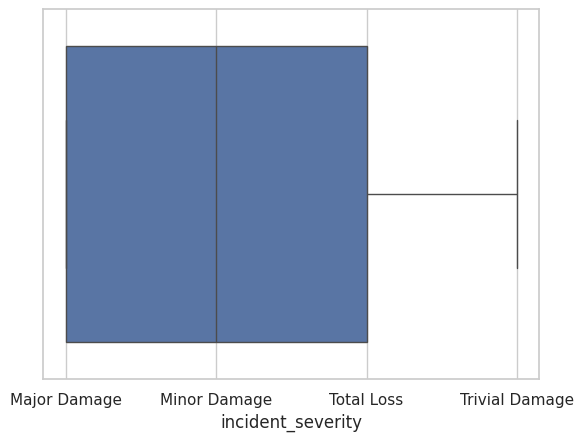

authorities_contacted


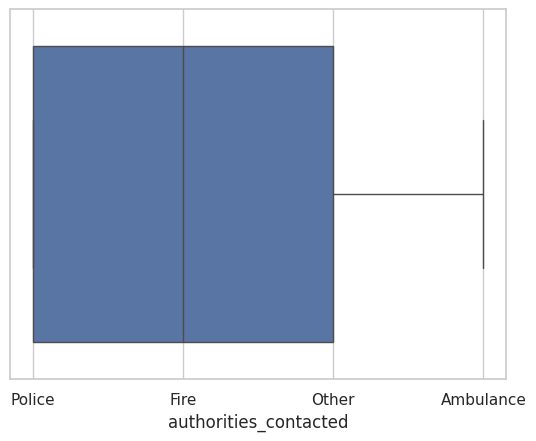

incident_state


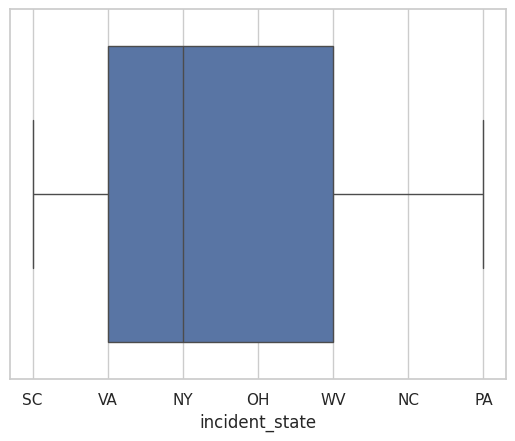

incident_city


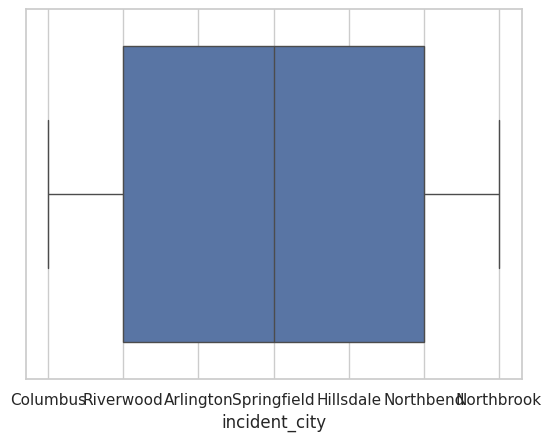

incident_location


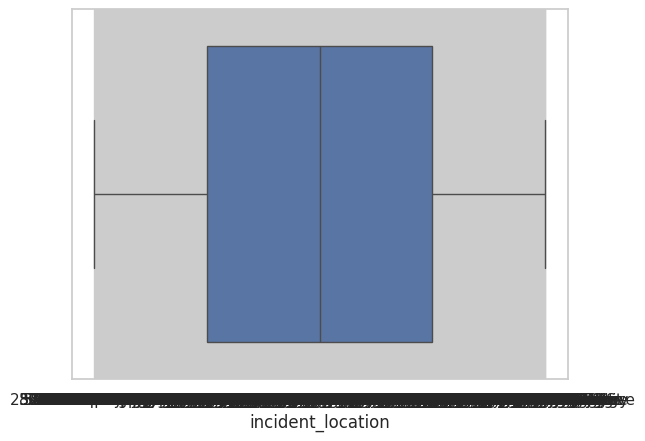

incident_hour_of_the_day


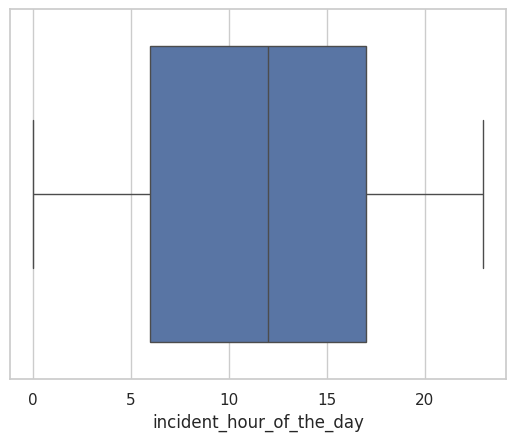

number_of_vehicles_involved


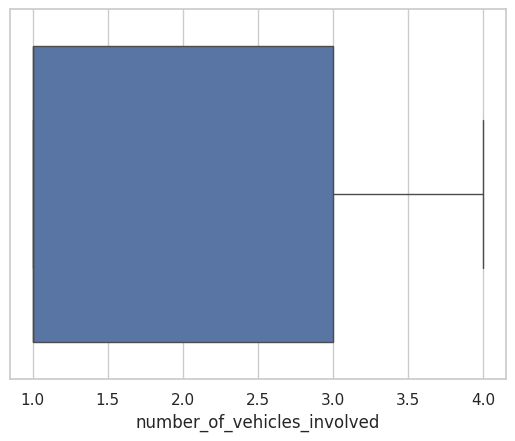

property_damage


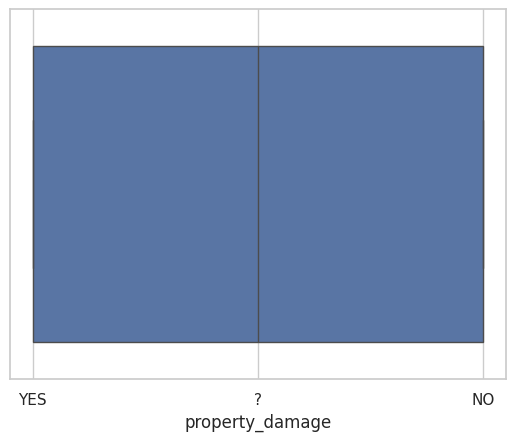

bodily_injuries


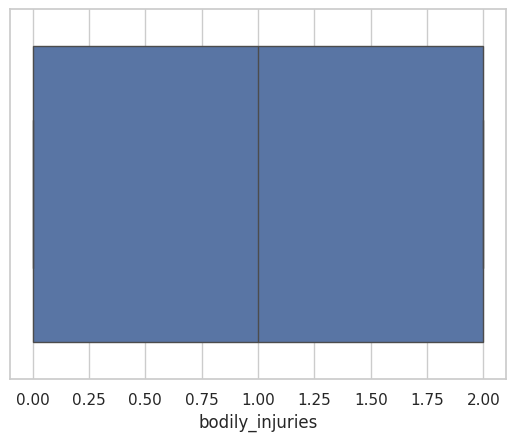

witnesses


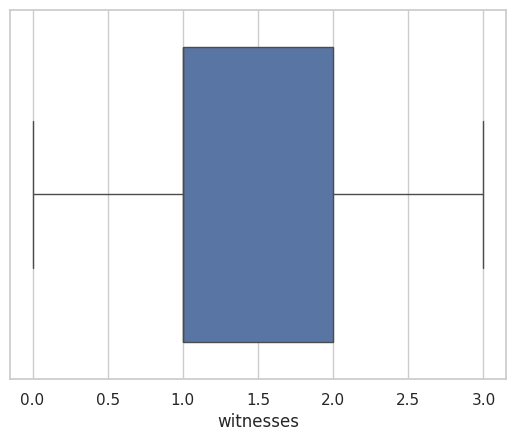

police_report_available


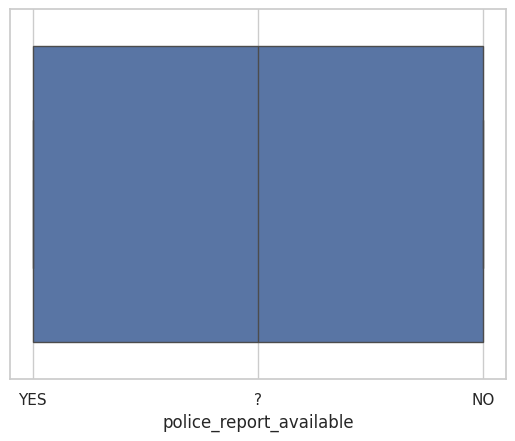

total_claim_amount


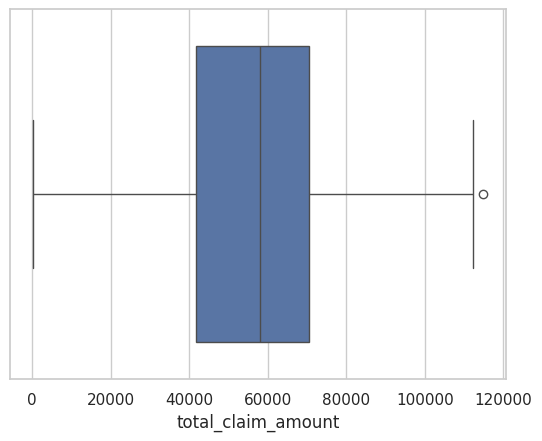

injury_claim


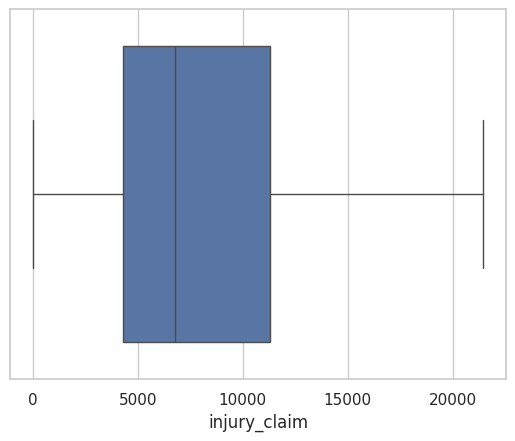

property_claim


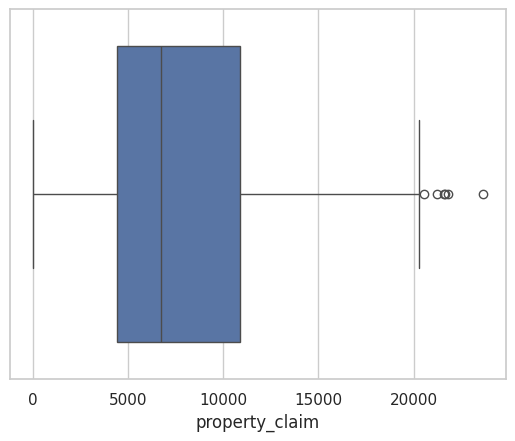

vehicle_claim


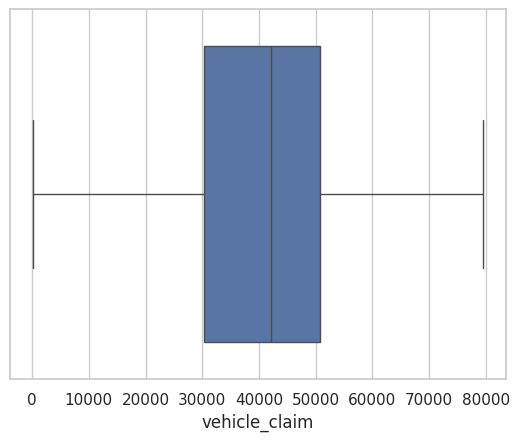

auto_make


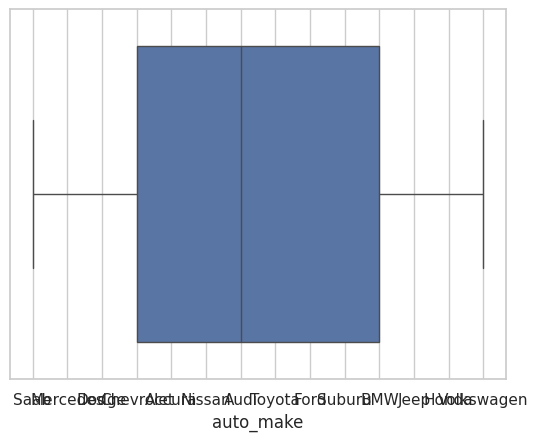

auto_model


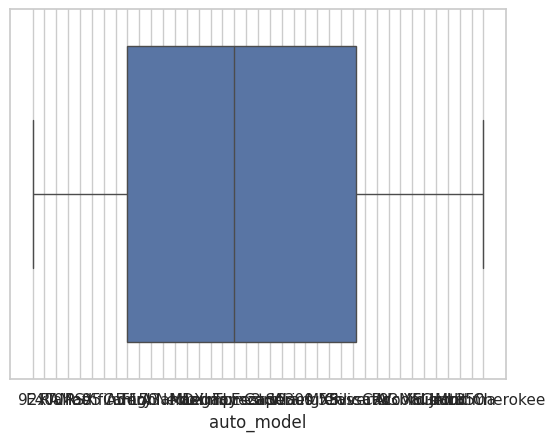

auto_year


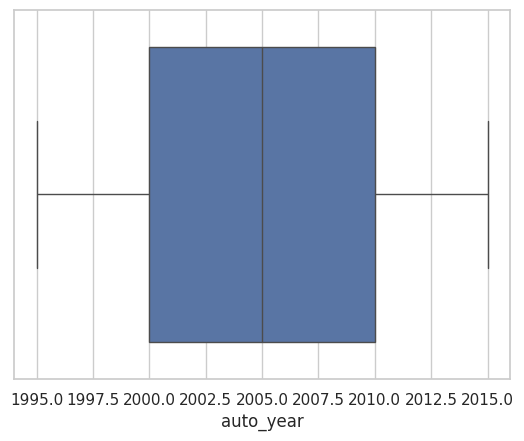

fraud_reported


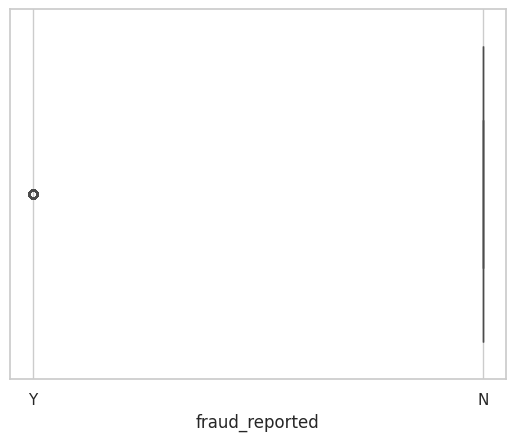

_c39


ValueError: List of boxplot statistics and `positions` values must have same the length

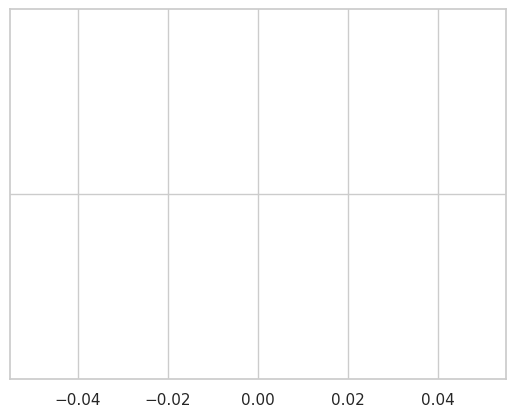

In [74]:
for k in df.columns:
  print(k)
  sns.boxplot(data=df,x=k)
  plt.show()

<Axes: xlabel='fraud_reported', ylabel='count'>

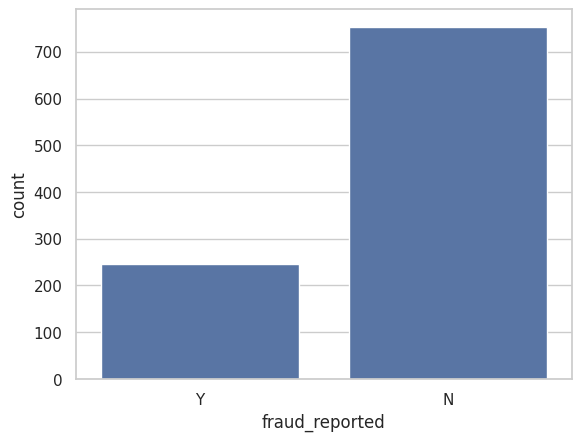

In [75]:
sns.countplot(data=df,x='fraud_reported')

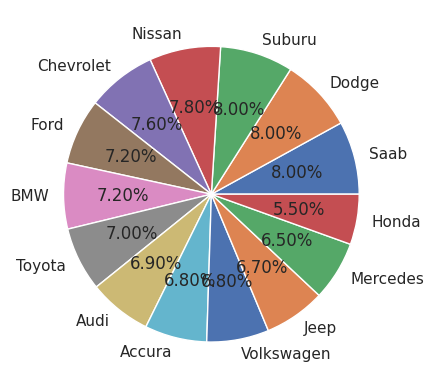

In [76]:
plt.pie(df['auto_make'].value_counts(),labels=df['auto_make'].value_counts().index,autopct='%1.2f%%')
plt.show()

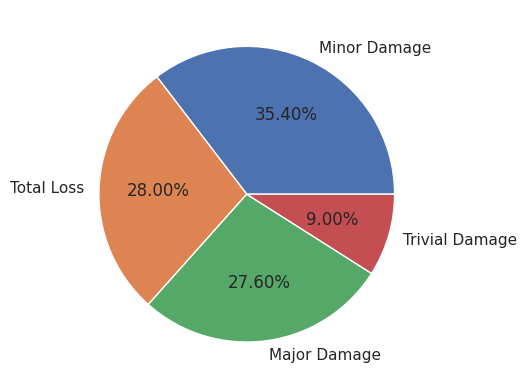

In [77]:
plt.pie(df['incident_severity'].value_counts(),labels=df['incident_severity'].value_counts().index,autopct='%1.2f%%')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

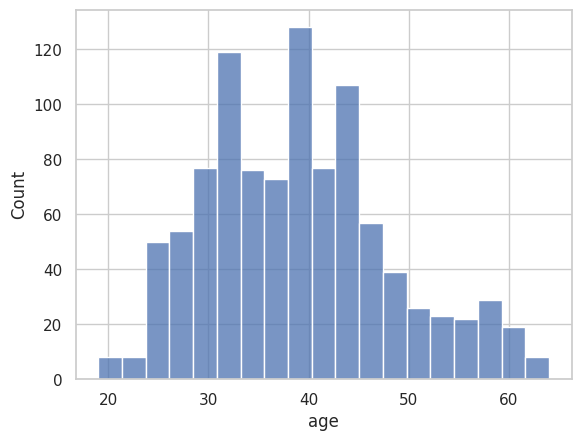

In [78]:
sns.histplot(data=df,x='age')


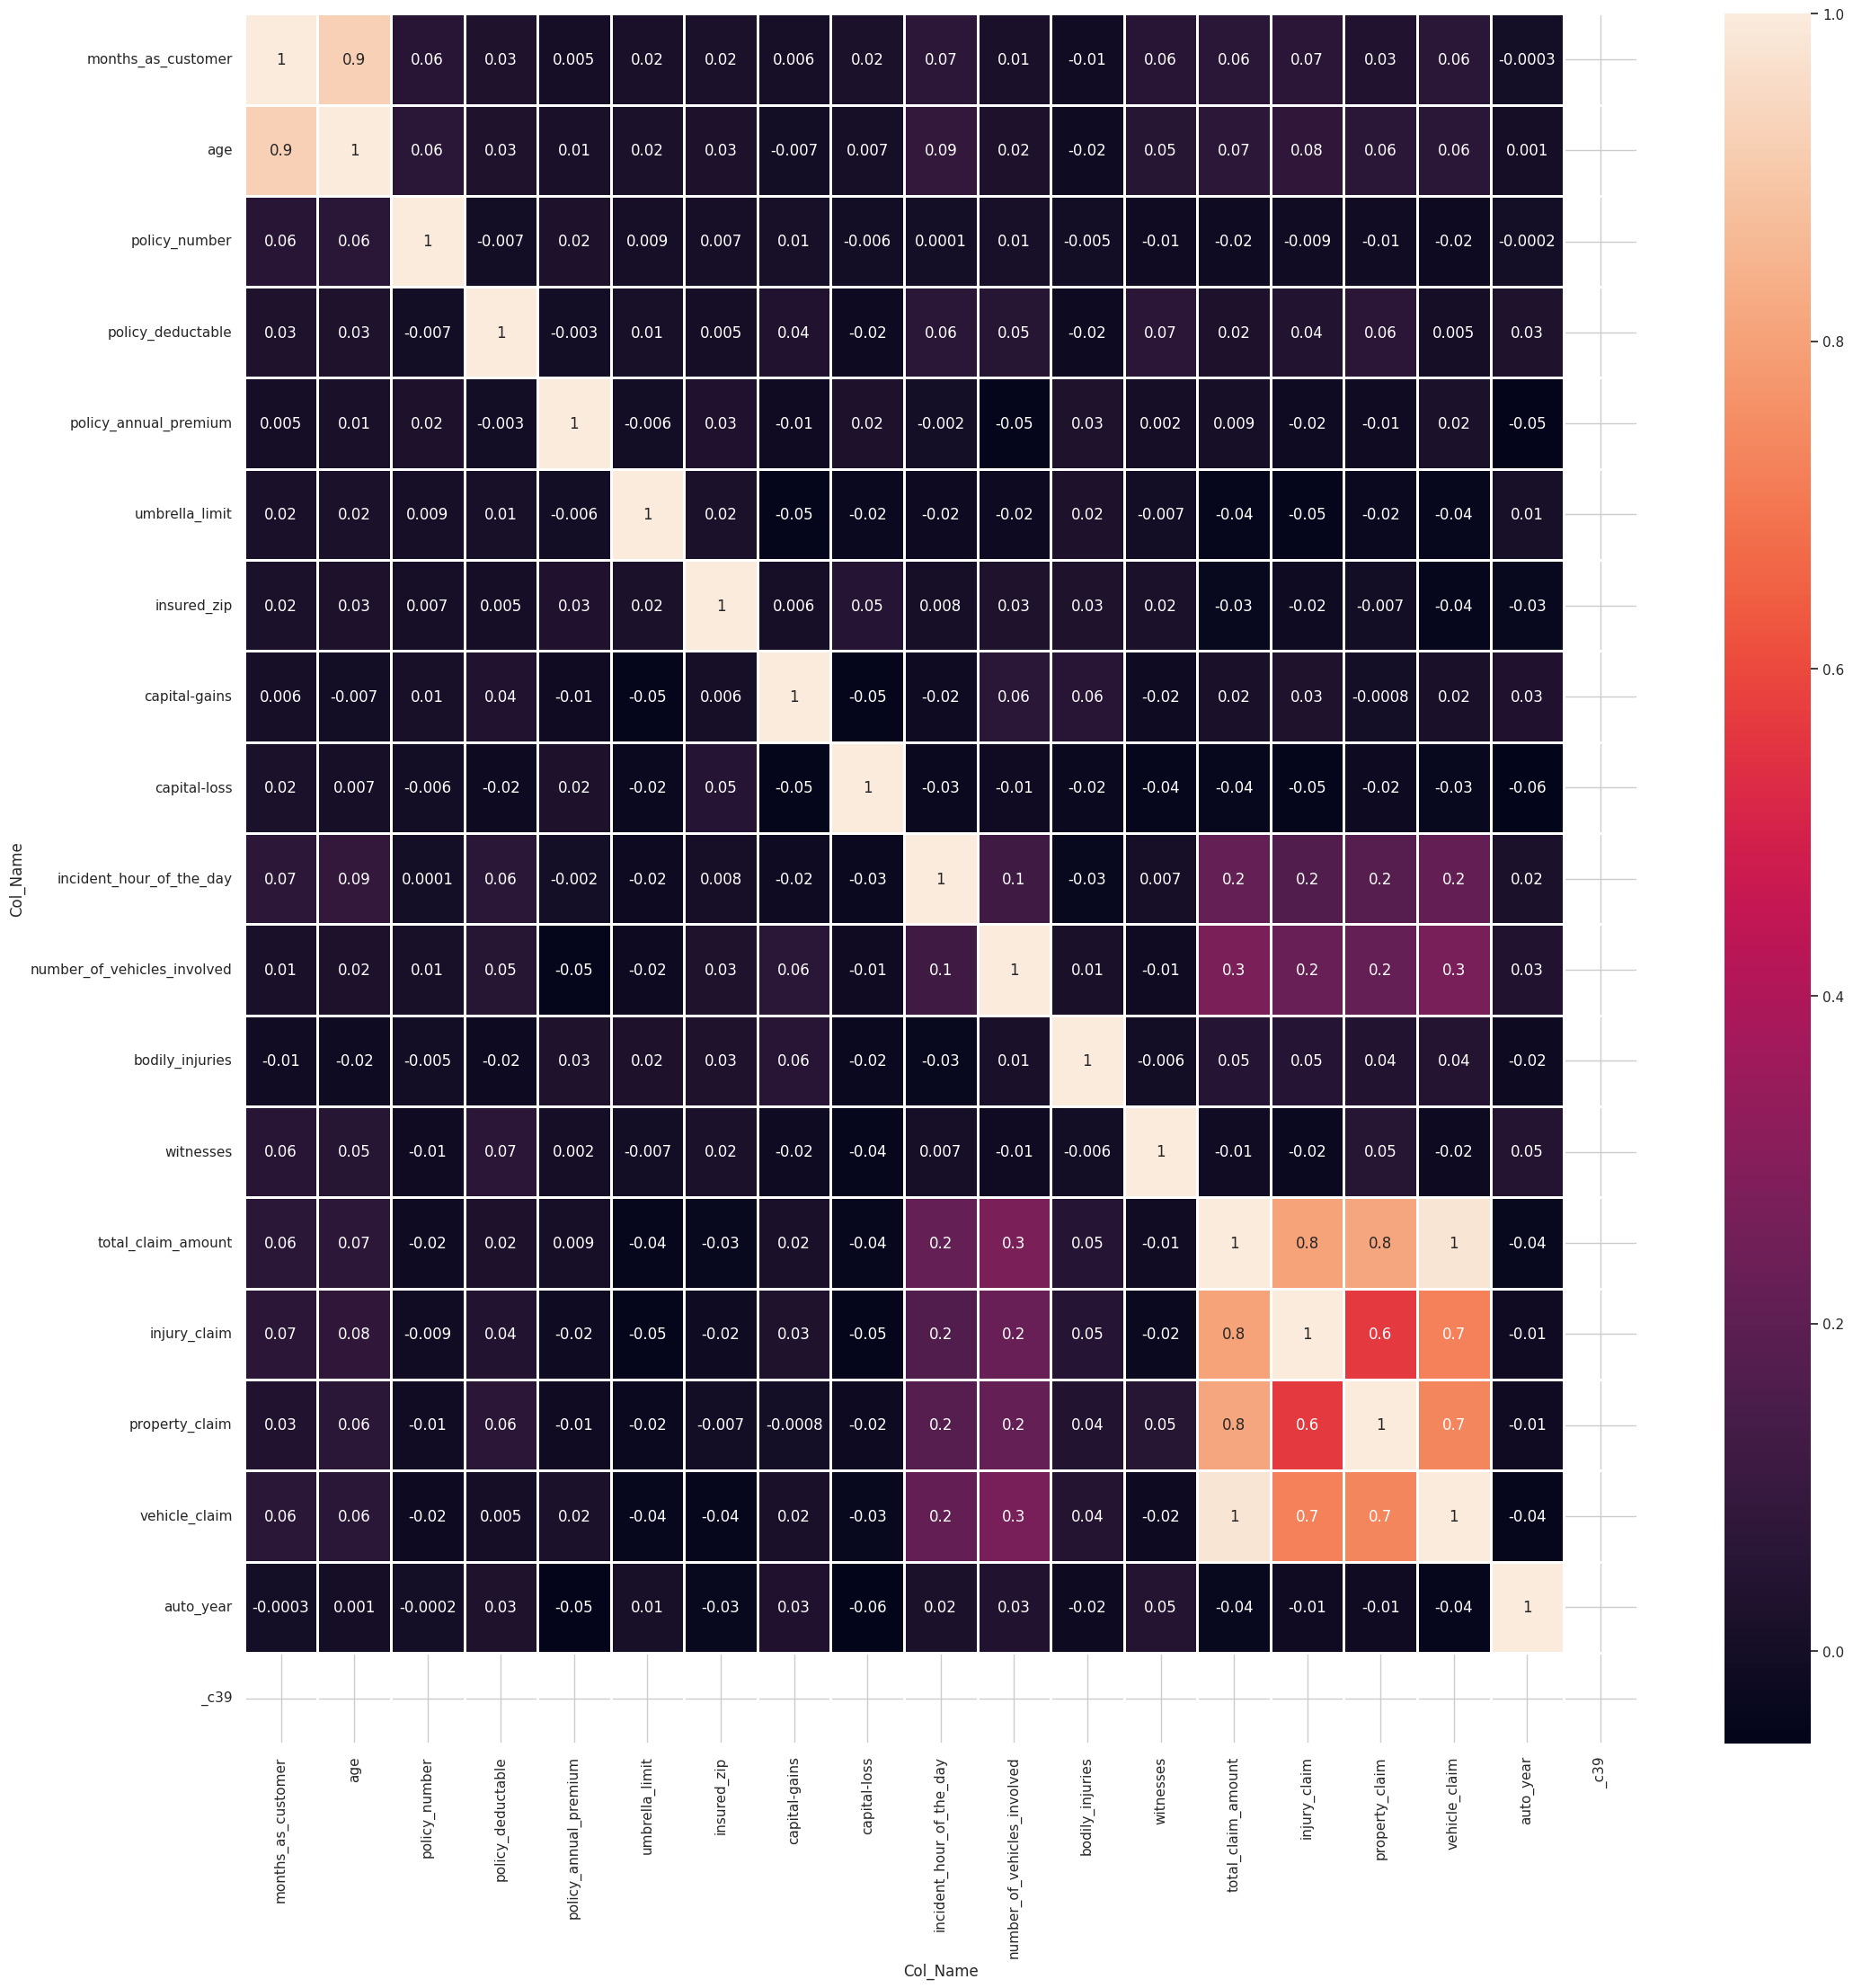

In [79]:
plt.figure(figsize=(25,25))
corr = df.corr(numeric_only=True)
sns.heatmap(data = corr, annot=True,fmt='.1g',linewidths=2)
plt.show()

In [80]:
df

Col_Name,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


,0
Col_Name,
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0


In [87]:
df = df.drop(columns=[
    "total_claim_amount",
    "injury_claim",
    "property_claim",
    "vehicle_claim",
    "months_as_customer",
    "age",

])

KeyError: "['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'months_as_customer', 'age'] not found in axis"

In [89]:
df = df.drop(columns="policy_bind_date")

In [90]:
df

Col_Name,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year,fraud_reported,_c39
0,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,...,1,YES,1,2,YES,Saab,92x,2004,Y,NaN
1,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,...,1,?,0,0,?,Mercedes,E400,2007,Y,NaN
2,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,...,3,NO,2,3,NO,Dodge,RAM,2007,N,NaN
3,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,...,1,?,1,2,NO,Chevrolet,Tahoe,2014,Y,NaN
4,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,...,1,NO,0,1,NO,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,...,1,YES,0,1,?,Honda,Accord,2006,N,NaN
996,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,...,1,YES,2,3,?,Volkswagen,Passat,2015,N,NaN
997,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,...,3,?,2,3,YES,Suburu,Impreza,1996,N,NaN
998,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,...,1,?,0,1,YES,Audi,A5,1998,N,NaN


In [84]:
df.dtypes

,0
Col_Name,
policy_number,int64
policy_bind_date,object
policy_state,object
policy_csl,object
policy_deductable,int64
policy_annual_premium,float64
umbrella_limit,int64
insured_zip,int64
insured_sex,object


In [91]:
df.replace("?", np.nan, inplace=True)

In [92]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [93]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)  # ensure string
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [94]:
df

Col_Name,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year,fraud_reported,_c39
0,521585,2,1,1000,1406.91,0,466132,1,4,2,...,1,1,1,2,1,10,1,2004,1,NaN
1,342868,1,1,2000,1197.22,5000000,468176,1,4,6,...,1,2,0,0,2,8,12,2007,1,NaN
2,687698,2,0,2000,1413.14,5000000,430632,0,6,11,...,3,0,2,3,0,4,30,2007,0,NaN
3,227811,0,1,2000,1415.74,6000000,608117,0,6,1,...,1,2,1,2,0,3,34,2014,1,NaN
4,367455,0,2,1000,1583.91,6000000,610706,1,0,11,...,1,0,0,1,0,0,31,2009,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,941851,2,2,1000,1310.80,0,431289,0,5,2,...,1,1,0,1,2,6,6,2006,0,NaN
996,186934,0,0,1000,1436.79,0,608177,0,6,9,...,1,1,2,3,2,13,28,2015,0,NaN
997,918516,2,1,500,1383.49,3000000,442797,0,5,1,...,3,2,2,3,1,11,19,1996,0,NaN
998,533940,0,2,2000,1356.92,5000000,441714,1,0,5,...,1,2,0,1,1,1,5,1998,0,NaN


In [101]:
df.drop(columns=["_c39"] , inplace=True)

In [103]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [105]:
df.shape


(1000, 32)

In [106]:
df_imputed

Col_Name,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year,fraud_reported
0,521585.0,2.0,1.0,1000.0,1406.91,0.0,466132.0,1.0,4.0,2.0,...,5.0,1.0,1.0,1.0,2.0,1.0,10.0,1.0,2004.0,1.0
1,342868.0,1.0,1.0,2000.0,1197.22,5000000.0,468176.0,1.0,4.0,6.0,...,8.0,1.0,2.0,0.0,0.0,2.0,8.0,12.0,2007.0,1.0
2,687698.0,2.0,0.0,2000.0,1413.14,5000000.0,430632.0,0.0,6.0,11.0,...,7.0,3.0,0.0,2.0,3.0,0.0,4.0,30.0,2007.0,0.0
3,227811.0,0.0,1.0,2000.0,1415.74,6000000.0,608117.0,0.0,6.0,1.0,...,5.0,1.0,2.0,1.0,2.0,0.0,3.0,34.0,2014.0,1.0
4,367455.0,0.0,2.0,1000.0,1583.91,6000000.0,610706.0,1.0,0.0,11.0,...,20.0,1.0,0.0,0.0,1.0,0.0,0.0,31.0,2009.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,941851.0,2.0,2.0,1000.0,1310.80,0.0,431289.0,0.0,5.0,2.0,...,20.0,1.0,1.0,0.0,1.0,2.0,6.0,6.0,2006.0,0.0
996,186934.0,0.0,0.0,1000.0,1436.79,0.0,608177.0,0.0,6.0,9.0,...,23.0,1.0,1.0,2.0,3.0,2.0,13.0,28.0,2015.0,0.0
997,918516.0,2.0,1.0,500.0,1383.49,3000000.0,442797.0,0.0,5.0,1.0,...,4.0,3.0,2.0,2.0,3.0,1.0,11.0,19.0,1996.0,0.0
998,533940.0,0.0,2.0,2000.0,1356.92,5000000.0,441714.0,1.0,0.0,5.0,...,2.0,1.0,2.0,0.0,1.0,1.0,1.0,5.0,1998.0,0.0


In [107]:
for col in cat_cols:
    df_imputed[col] = df_imputed[col].round().astype(int)
    df_imputed[col] = encoders[col].inverse_transform(df_imputed[col])

In [109]:
df_imputed

Col_Name,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year,fraud_reported
0,521585.0,OH,250/500,1000.0,1406.91,0.0,466132.0,MALE,MD,craft-repair,...,5.0,1.0,YES,1.0,2.0,YES,Saab,92x,2004.0,Y
1,342868.0,IN,250/500,2000.0,1197.22,5000000.0,468176.0,MALE,MD,machine-op-inspct,...,8.0,1.0,nan,0.0,0.0,nan,Mercedes,E400,2007.0,Y
2,687698.0,OH,100/300,2000.0,1413.14,5000000.0,430632.0,FEMALE,PhD,sales,...,7.0,3.0,NO,2.0,3.0,NO,Dodge,RAM,2007.0,N
3,227811.0,IL,250/500,2000.0,1415.74,6000000.0,608117.0,FEMALE,PhD,armed-forces,...,5.0,1.0,nan,1.0,2.0,NO,Chevrolet,Tahoe,2014.0,Y
4,367455.0,IL,500/1000,1000.0,1583.91,6000000.0,610706.0,MALE,Associate,sales,...,20.0,1.0,NO,0.0,1.0,NO,Accura,RSX,2009.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,941851.0,OH,500/1000,1000.0,1310.80,0.0,431289.0,FEMALE,Masters,craft-repair,...,20.0,1.0,YES,0.0,1.0,nan,Honda,Accord,2006.0,N
996,186934.0,IL,100/300,1000.0,1436.79,0.0,608177.0,FEMALE,PhD,prof-specialty,...,23.0,1.0,YES,2.0,3.0,nan,Volkswagen,Passat,2015.0,N
997,918516.0,OH,250/500,500.0,1383.49,3000000.0,442797.0,FEMALE,Masters,armed-forces,...,4.0,3.0,nan,2.0,3.0,YES,Suburu,Impreza,1996.0,N
998,533940.0,IL,500/1000,2000.0,1356.92,5000000.0,441714.0,MALE,Associate,handlers-cleaners,...,2.0,1.0,nan,0.0,1.0,YES,Audi,A5,1998.0,N
